In [23]:
from sklearn.preprocessing import LabelBinarizer
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split

In [2]:
image_dir = r"C:\Users\balle\Documents\DSTI\DL\hand_gestures_categorization\resources\output"

In [4]:
def load_images_and_labels(image_dir):
    image_data = []
    labels = []

    for image in os.listdir(image_dir):
        file_path = os.path.join(image_dir, image)
        if image.endswith(".png") or image.endswith(".jpg"):
            img = cv2.imread(file_path)
            if img is not None:
                image_data.append(img)
                label = image.split("_")[0].lower()
                labels.append(label)
            else:
                print(f"Failed to load image : {image}")
    return np.array(image_data), labels

def one_hot_encode_labels(labels):
    lb = LabelBinarizer()
    one_hot_labels = lb.fit_transform(labels)
    return one_hot_labels, lb.classes_

In [5]:
images, labels = load_images_and_labels(image_dir)

In [18]:
print(labels[1240:1260])

['crossed', 'crossed', 'crossed', 'crossed', 'crossed', 'crossed', 'crossed', 'crossed', 'fine', 'fine', 'fine', 'fine', 'fine', 'fine', 'fine', 'fine', 'fine', 'fine', 'fine', 'fine']


In [20]:
one_hot_labels, class_names = one_hot_encode_labels(labels)

In [21]:
print(one_hot_labels[1240:1260])

[[1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]]


In [25]:
X_train, X_val, y_train, y_val = train_test_split(
    images, one_hot_labels, test_size=0.2, random_state=42
)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(9984, 100, 100, 3) (2496, 100, 100, 3) (9984, 10) (2496, 10)


In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

In [31]:
def create_cnn_model(input_shape, num_classes):
    model = Sequential()

    # First convolutional layer
    model.add(Conv2D(32, (3, 3), activation="relu", input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Second convolutional layer
    model.add(Conv2D(64, (3, 3), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten the output of the convolutional layers to feed into Dense layers
    model.add(Flatten())

    # Fully connected Dense layer
    model.add(Dense(128, activation="relu"))

    # Output layer for classification
    model.add(Dense(num_classes, activation="softmax"))

    return model

In [32]:
# Create the model with input shape (height, width, channels) and number of classes
input_shape = images.shape[1:]  # e.g., (100, 100, 3) for 100x100 RGB images
num_classes = one_hot_labels.shape[1]  # Number of unique classes in the dataset

model = create_cnn_model(input_shape, num_classes)

# Compile the model with optimizer, loss function, and metrics
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Summary of the model
model.summary()

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

# Evaluate the model on validation set
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

c:\Users\balle\Documents\DSTI\DL\hand_gestures_categorization\.venv\DL\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 33856)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,333,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,354,378 (16.61 MB)

 Trainable params: 4,354,378 (16.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 38s 117ms/step - accuracy: 0.1326 - loss: 80.7990 - val_accuracy: 0.2452 - val_loss: 2.0347
Epoch 2/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 36s 117ms/step - accuracy: 0.3091 - loss: 1.8776 - val_accuracy: 0.3474 - val_loss: 1.7324
Epoch 3/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 36s 116ms/step - accuracy: 0.3906 - loss: 1.6290 - val_accuracy: 0.3798 - val_loss: 1.6360
Epoch 4/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 36s 117ms/step - accuracy: 0.4312 - loss: 1.5250 - val_accuracy: 0.3894 - val_loss: 1.6289
Epoch 5/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 41s 133ms/step - accuracy: 0.4635 - loss: 1.4702 - val_accuracy: 0.3946 - val_loss: 1.5869
Epoch 6/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 45s 144ms/step - accuracy: 0.4876 - loss: 1.4108 - val_accuracy: 0.4103 - val_loss: 1.6001
Epoch 7/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 45s 145ms/step - accuracy: 0.4915 - loss: 1.4129 - val_accuracy: 0.4223 - val_loss: 1.6700
Epoch 8/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 45s 145ms/step - accuracy: 0.5367 - loss: 

In [37]:
import matplotlib.pyplot as plt

In [38]:
def plot_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper left')

    plt.tight_layout()
    plt.show()

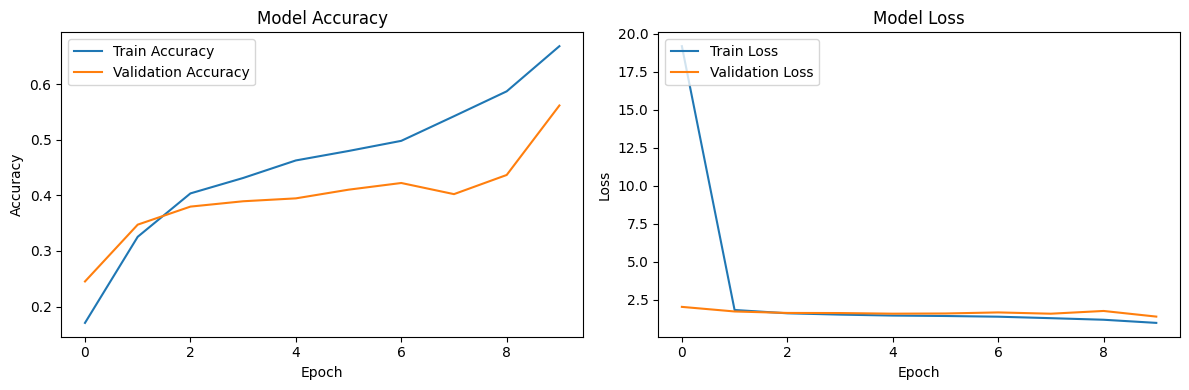

In [39]:
plot_history(history)

Removing some input pictures because they're not in the correct orientation

In [34]:
image_dir2 = r"C:\Users\balle\Documents\DSTI\DL\hand_gestures_categorization\resources\output2"

In [35]:
images2, labels2 = load_images_and_labels(image_dir2)
one_hot_labels2, class_names2 = one_hot_encode_labels(labels2)

In [36]:
X_train2, X_val2, y_train2, y_val2 = train_test_split(
    images2, one_hot_labels2, test_size=0.2, random_state=42
)
print(X_train2.shape, X_val2.shape, y_train2.shape, y_val2.shape)

(9692, 100, 100, 3) (2424, 100, 100, 3) (9692, 10) (2424, 10)


Epoch 1/10
303/303 ━━━━━━━━━━━━━━━━━━━━ 33s 106ms/step - accuracy: 0.5359 - loss: 1.3283 - val_accuracy: 0.6572 - val_loss: 1.0829
Epoch 2/10
303/303 ━━━━━━━━━━━━━━━━━━━━ 29s 96ms/step - accuracy: 0.7247 - loss: 0.8382 - val_accuracy: 0.6630 - val_loss: 1.0039
Epoch 3/10
303/303 ━━━━━━━━━━━━━━━━━━━━ 29s 96ms/step - accuracy: 0.8196 - loss: 0.5680 - val_accuracy: 0.7273 - val_loss: 0.8420
Epoch 4/10
303/303 ━━━━━━━━━━━━━━━━━━━━ 31s 102ms/step - accuracy: 0.8941 - loss: 0.3390 - val_accuracy: 0.7636 - val_loss: 0.7811
Epoch 5/10
303/303 ━━━━━━━━━━━━━━━━━━━━ 32s 104ms/step - accuracy: 0.9376 - loss: 0.2039 - val_accuracy: 0.7838 - val_loss: 0.8472
Epoch 6/10
303/303 ━━━━━━━━━━━━━━━━━━━━ 32s 105ms/step - accuracy: 0.9583 - loss: 0.1620 - val_accuracy: 0.7929 - val_loss: 0.9788
Epoch 7/10
303/303 ━━━━━━━━━━━━━━━━━━━━ 37s 122ms/step - accuracy: 0.9775 - loss: 0.0793 - val_accuracy: 0.7892 - val_loss: 1.0962
Epoch 8/10
303/303 ━━━━━━━━━━━━━━━━━━━━ 39s 130ms/step - accuracy: 0.9683 - loss: 0.1

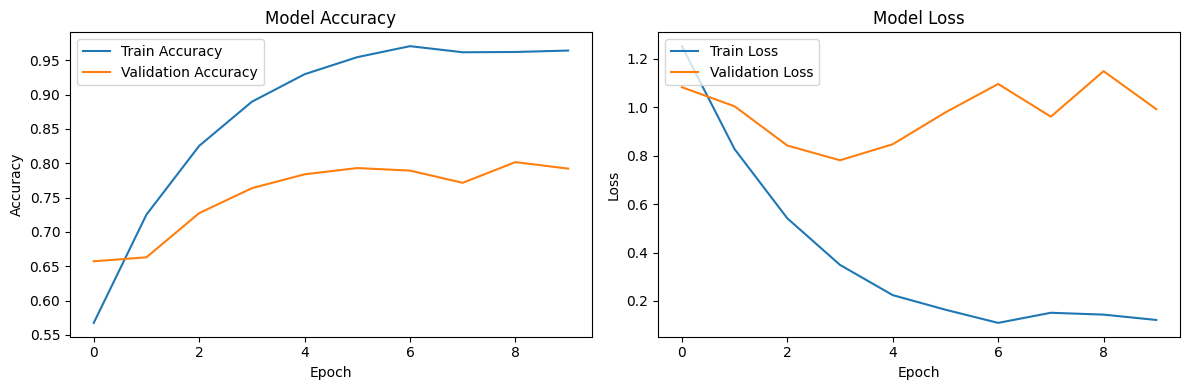

In [40]:
input_shape = images2.shape[1:]  # e.g., (100, 100, 3) for 100x100 RGB images
num_classes = one_hot_labels2.shape[1]  # Number of unique classes in the dataset

# Train the model
history2 = model.fit(X_train2, y_train2, validation_data=(X_val2, y_val2), epochs=10, batch_size=32)

# Evaluate the model on validation set
val_loss2, val_accuracy2 = model.evaluate(X_val2, y_val2)
print(f"Validation Loss: {val_loss2}")
print(f"Validation Accuracy: {val_accuracy2}")
plot_history(history2)

I forgot to recreate the model so I do it here

c:\Users\balle\Documents\DSTI\DL\hand_gestures_categorization\.venv\DL\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 33856)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     4,333,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,354,378 (16.61 MB)

 Trainable params: 4,354,378 (16.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
303/303 ━━━━━━━━━━━━━━━━━━━━ 33s 105ms/step - accuracy: 0.1318 - loss: 77.1836 - val_accuracy: 0.2380 - val_loss: 2.0671
Epoch 2/10
303/303 ━━━━━━━━━━━━━━━━━━━━ 36s 120ms/step - accuracy: 0.3025 - loss: 1.8867 - val_accuracy: 0.3160 - val_loss: 1.8342
Epoch 3/10
303/303 ━━━━━━━━━━━━━━━━━━━━ 38s 126ms/step - accuracy: 0.3991 - loss: 1.6384 - val_accuracy: 0.3659 - val_loss: 1.6584
Epoch 4/10
303/303 ━━━━━━━━━━━━━━━━━━━━ 38s 126ms/step - accuracy: 0.4235 - loss: 1.5396 - val_accuracy: 0.3771 - val_loss: 1.6852
Epoch 5/10
303/303 ━━━━━━━━━━━━━━━━━━━━ 38s 126ms/step - accuracy: 0.4258 - loss: 1.5183 - val_accuracy: 0.3870 - val_loss: 1.6345
Epoch 6/10
303/303 ━━━━━━━━━━━━━━━━━━━━ 35s 114ms/step - accuracy: 0.4371 - loss: 1.4826 - val_accuracy: 0.3894 - val_loss: 1.6307
Epoch 7/10
303/303 ━━━━━━━━━━━━━━━━━━━━ 36s 119ms/step - accuracy: 0.4522 - loss: 1.4578 - val_accuracy: 0.3952 - val_loss: 1.5702
Epoch 8/10
303/303 ━━━━━━━━━━━━━━━━━━━━ 35s 117ms/step - accuracy: 0.4472 - loss: 

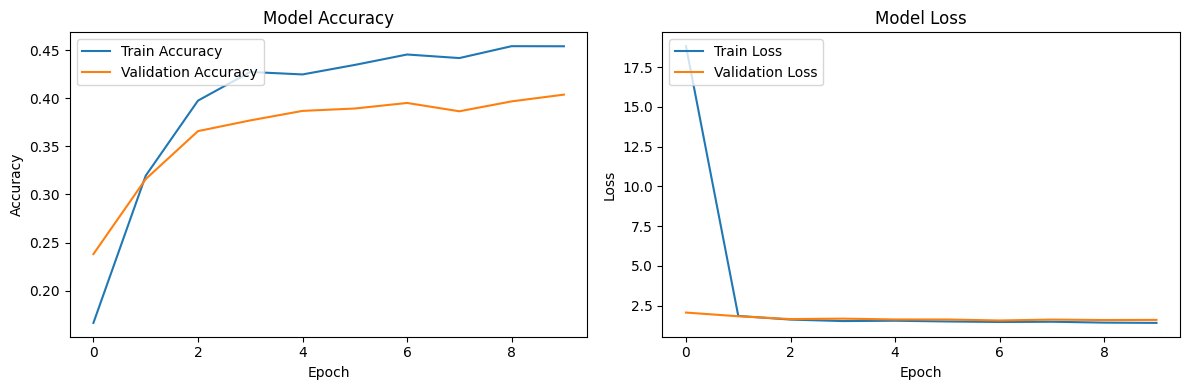

In [41]:
# Create the model with input shape (height, width, channels) and number of classes
input_shape = images2.shape[1:]  # e.g., (100, 100, 3) for 100x100 RGB images
num_classes = one_hot_labels2.shape[1]  # Number of unique classes in the dataset

model2 = create_cnn_model(input_shape, num_classes)

# Compile the model with optimizer, loss function, and metrics
model2.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Summary of the model
model2.summary()

# Train the model
history3 = model2.fit(X_train2, y_train2, validation_data=(X_val2, y_val2), epochs=10, batch_size=32)

# Evaluate the model on validation set
val_loss3, val_accuracy3 = model2.evaluate(X_val2, y_val2)
print(f"Validation Loss: {val_loss3}")
print(f"Validation Accuracy: {val_accuracy3}")
plot_history(history3)